#### Univariate Analysis for Categorical Features

In [37]:
fifa_cat = fifa.select_dtypes('object')

In [38]:
fifa_cat

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,real_face,player_tags,team_position,loaned_from,joined,nation_position,player_traits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,Argentina,FC Barcelona,"RW, CF, ST",Left,Medium/Low,Messi,Yes,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,NaN,2004-07-01,NaN,"Beat Offside Trap, Argues with Officials, Earl...",89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985-02-05,Portugal,Juventus,"ST, LW",Right,High/Low,C. Ronaldo,Yes,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,NaN,2018-07-10,LS,"Long Throw-in, Selfish, Argues with Officials,...",91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,1992-02-05,Brazil,Paris Saint-Germain,"LW, CAM",Right,High/Medium,Neymar,Yes,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,NaN,2017-08-03,LW,"Power Free-Kick, Injury Free, Selfish, Early C...",84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,1993-01-07,Slovenia,Atlético Madrid,GK,Right,Medium/Medium,Normal,Yes,NaN,GK,NaN,2014-07-16,GK,"Flair, Acrobatic Clearance",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,1991-01-07,Belgium,Real Madrid,"LW, CF",Right,High/Medium,Normal,Yes,"#Speedster, #Dribbler, #Acrobat",LW,NaN,2019-07-01,LF,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,1997-03-10,China PR,Beijing Renhe FC,CB,Right,Medium/High,Normal,No,NaN,RES,NaN,2018-07-13,NaN,NaN,32+2,32+2,32+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,33+2,33+2,33+2,33+2,33+2,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,1997-01-01,China PR,Shanghai SIPG FC,CB,Right,Medium/Medium,Normal,No,NaN,SUB,NaN,2019-02-01,NaN,NaN,33+2,33+2,33+2,33+2,32+2,32+2,32+2,33+2,33+2,33+2,33+2,35+2,36+2,36+2,36+2,35+2,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,2000-05-16,China PR,Hebei China Fortune FC,CM,Right,Low/Medium,Lean,No,NaN,SUB,NaN,2019-01-01,NaN,NaN,43+2,43+2,43+2,43+2,43+2,43+2,43+2,43+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,45+2,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,2000-08-02,China PR,Shanghai Greenland Shenhua FC,CM,Right,Low/Low,Lean,No,NaN,SUB,NaN,2019-02-01,NaN,NaN,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [39]:
fifa_cat.shape

(18278, 43)

##### 1. Top 10 Club in the Fifa20 Data Set

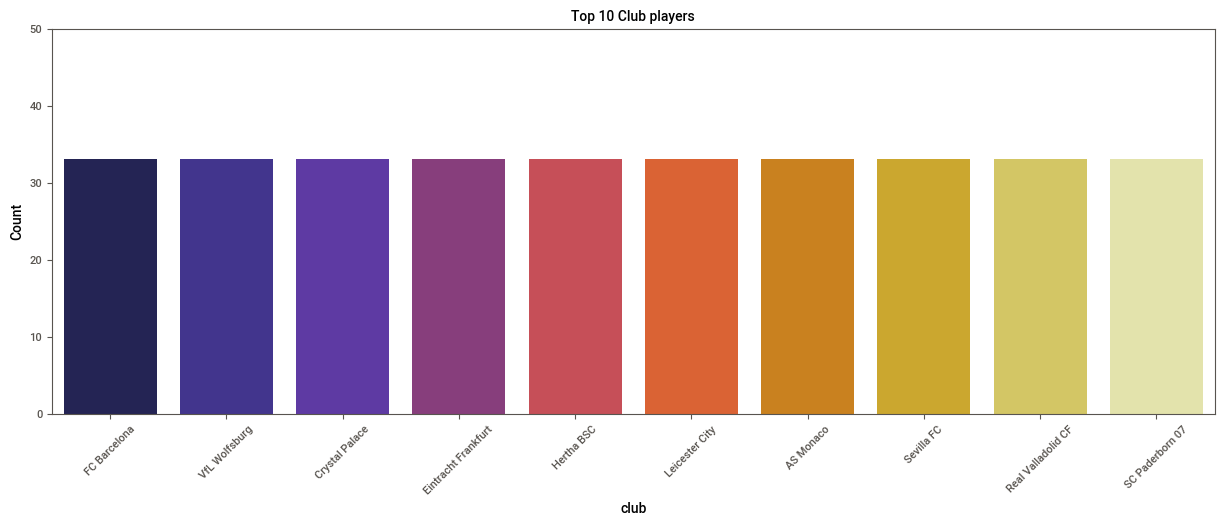

FC Barcelona           33
Real Valladolid CF     33
VfL Wolfsburg          33
Crystal Palace         33
Eintracht Frankfurt    33
Hertha BSC             33
Leicester City         33
AS Monaco              33
SC Paderborn 07        33
Sevilla FC             33
Name: club, dtype: int64


In [40]:
plt.figure(figsize = (15, 5))
top_club = fifa['club'].value_counts().nlargest(10)
sns.countplot(x = 'club', data = fifa[fifa['club'].isin(top_club.index)], palette = 'CMRmap')
plt.xlabel('club')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.title('Top 10 Club players', fontsize = 10)

plt.ylim(0, 50)  
plt.show()

print(top_club)

**Observation:**
- The players belonging to the above listed clubs are in the top 10 list each having 33 players.

##### 2. Top 10 Team Position in Fifa20 Data Set

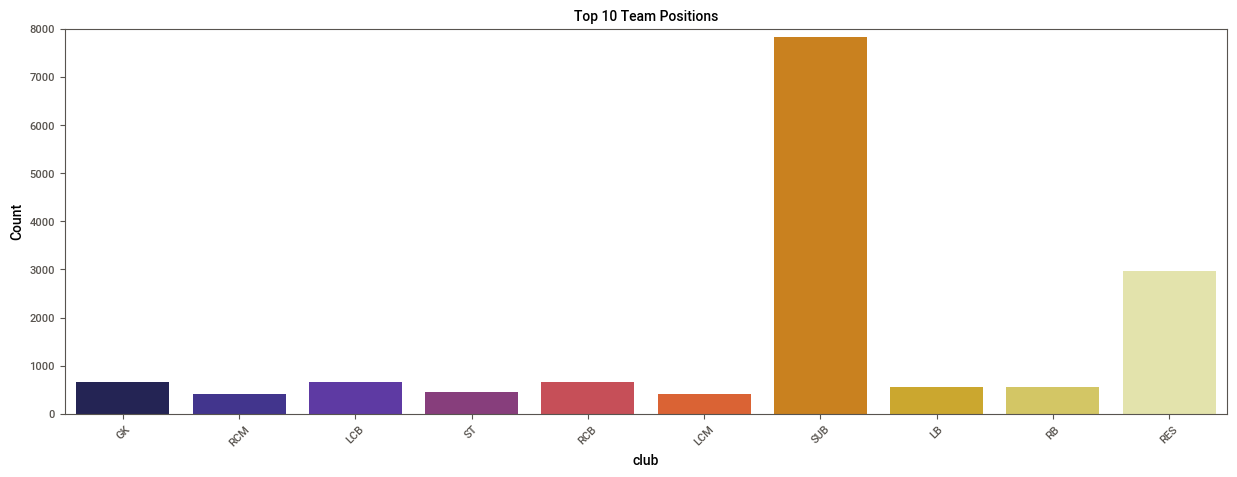

SUB    7820
RES    2958
GK      662
RCB     660
LCB     660
RB      560
LB      560
ST      458
RCM     411
LCM     411
Name: team_position, dtype: int64


In [41]:
plt.figure(figsize = (15, 5))
top_team = fifa['team_position'].value_counts().nlargest(10)
sns.countplot(x = 'team_position', data = fifa[fifa['team_position'].isin(top_team.index)], palette = 'CMRmap')
plt.xlabel('club')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.title('Top 10 Team Positions', fontsize = 10)

plt.ylim(0, 8000)  
plt.show()

print(top_team)

**Observation:**
- Team positions SUB and RES have maximum count.

In [42]:
uni_cat_col1 = fifa[['preferred_foot','work_rate','body_type','real_face']]
uni_cat_col = uni_cat_col1[(uni_cat_col1['body_type'] == 'Normal') | (uni_cat_col1['body_type'] == 'Lean') | (uni_cat_col1['body_type'] == 'Stocky')]
uni_cat_col.head()

,preferred_foot,work_rate,body_type,real_face
3,Right,Medium/Medium,Normal,Yes
4,Right,High/Medium,Normal,Yes
5,Right,High/High,Normal,Yes
6,Right,Medium/Medium,Normal,Yes
7,Right,Medium/Medium,Normal,Yes


##### 3. Distribution of players based on preferred_foot', work_rate, body_type and real_face

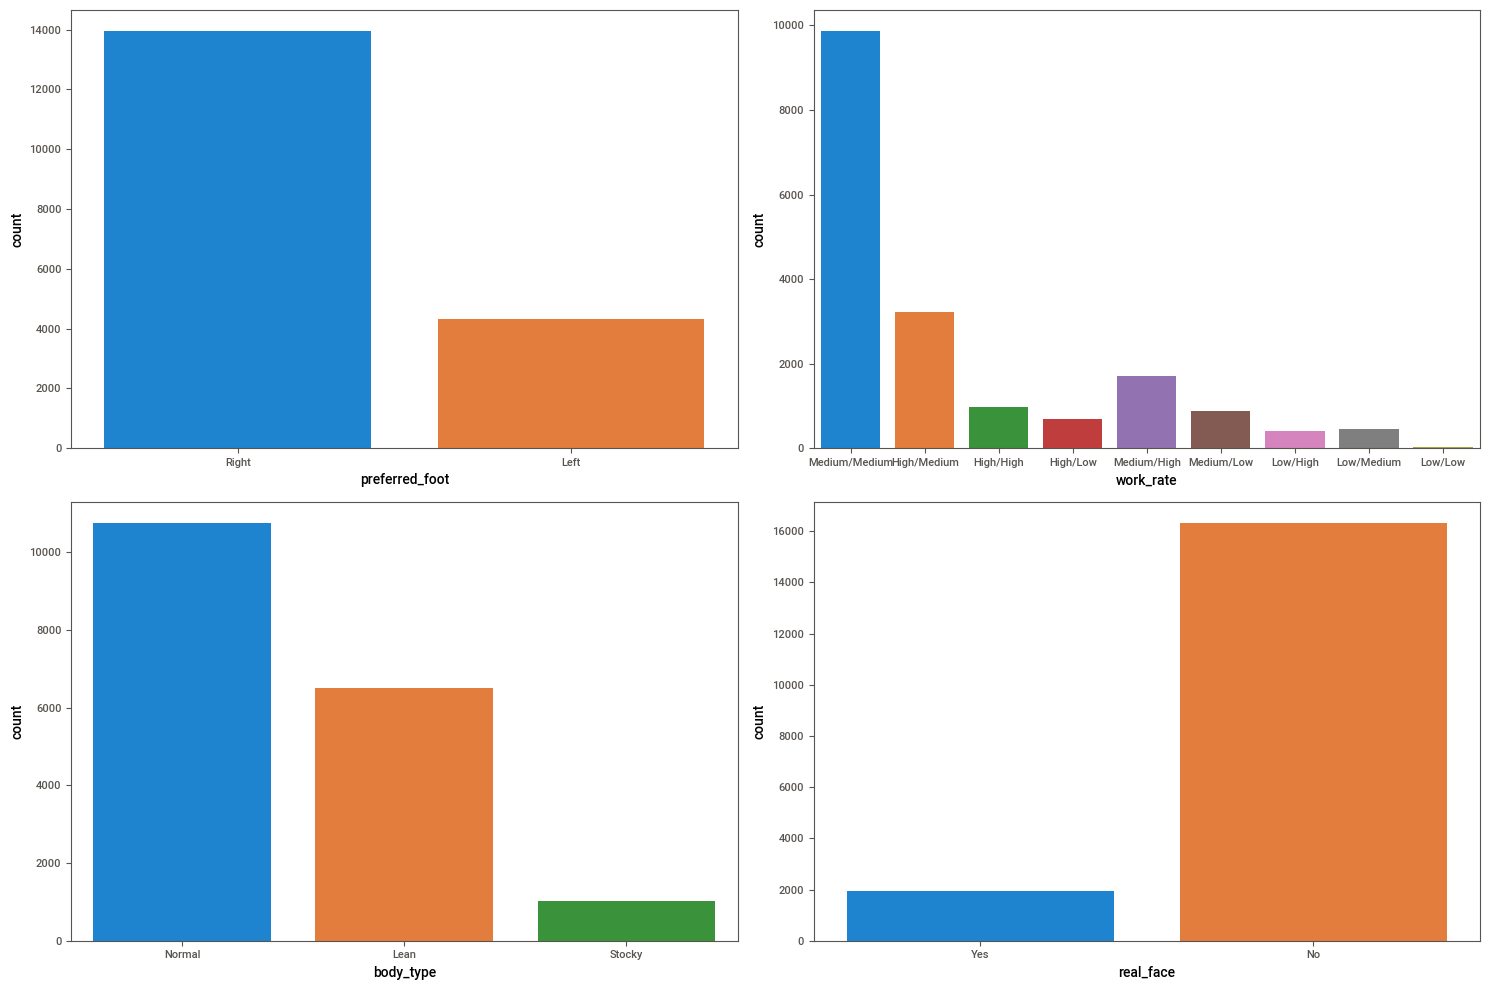

In [43]:
uni_cat_col1 = uni_cat_col.columns.to_list()

df_selected = uni_cat_col[uni_cat_col1]

# Creating subplots 

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
axs = axs.flatten()

# Plotting countplot for each feature

for i, col in enumerate(df_selected.columns):
    sns.countplot(data = df_selected, x = col, ax = axs[i])
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()

**Observation:**
- Most of the players are right footed
- Work_Rate of Medium/Medium has the highest number of observation among players.
- Most of the players have a normal body type.
- Real Face having 'NO' values the most.

#### Bivariate Analysis for Categorical Features

#####  1. Impact of Team Position to Shooting

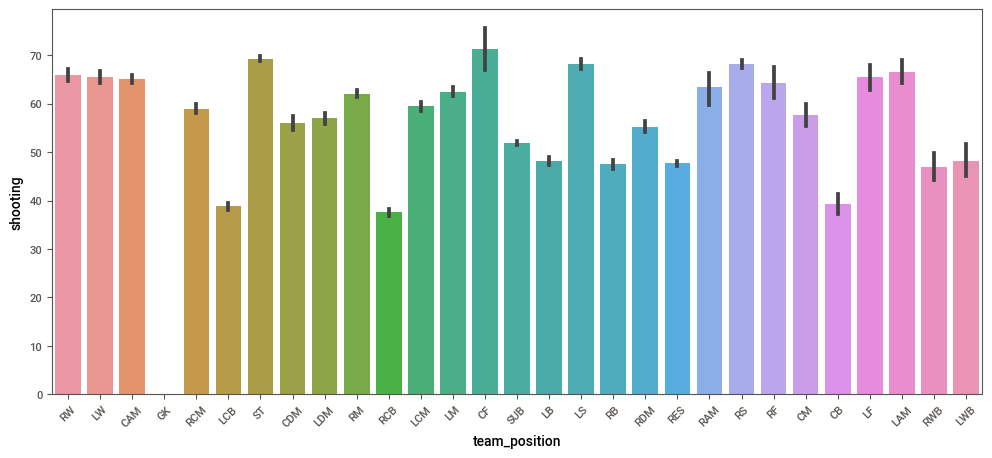

In [44]:
plt.figure(figsize = (12, 5))
sns.barplot(x = 'team_position', y = 'shooting', data = fifa)
plt.xticks(rotation = 45)
plt.show()

**Observation:**
- In this plot we can clearly see that GK team position has no shooting score.
- We can also observe that CF team position has maximum shooting score.

#####  2. Impact of Work Rate to Skill Moves

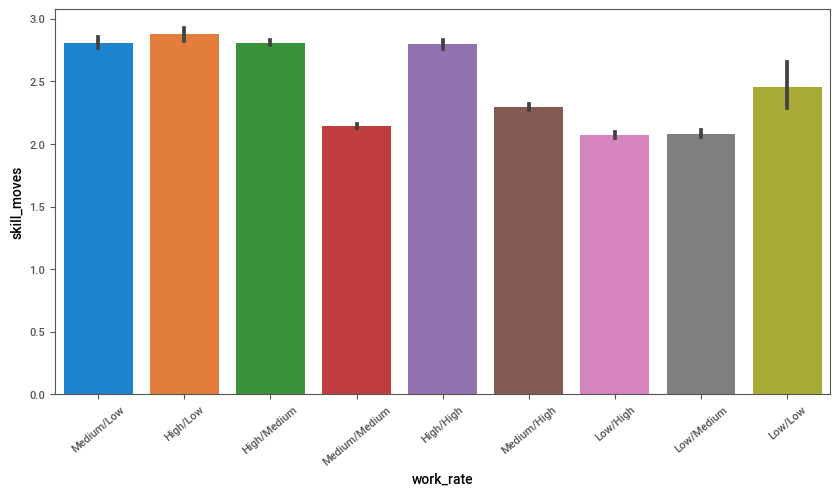

In [45]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'work_rate', y = 'skill_moves', data = fifa)
plt.xticks(rotation = 40)
plt.show()

**Observation:**
- From the plot, it can be infered that work rate (medium/low, high/low, high/medium, high/high) has more than 2.5 skill moves.

##### 3. Listing Top 10 Players

In [46]:
top_ten = fifa.sort_values(by = 'overall', ascending = False)[ :10]
ranking = [i for i in range(1, 11)]
player_names = top_ten['short_name'].values.tolist()

top_10_players = pd.DataFrame({'Ranking': ranking, 'Player': player_names})

top_10_players = top_10_players.set_index('Player')
top_10_players

,Ranking
Player,
L. Messi,1
Cristiano Ronaldo,2
Neymar Jr,3
J. Oblak,4
E. Hazard,5
K. De Bruyne,6
M. ter Stegen,7
V. van Dijk,8
L. Modrić,9


##### 4. Visualizing the Top 10 players with most overall rating and potential rating

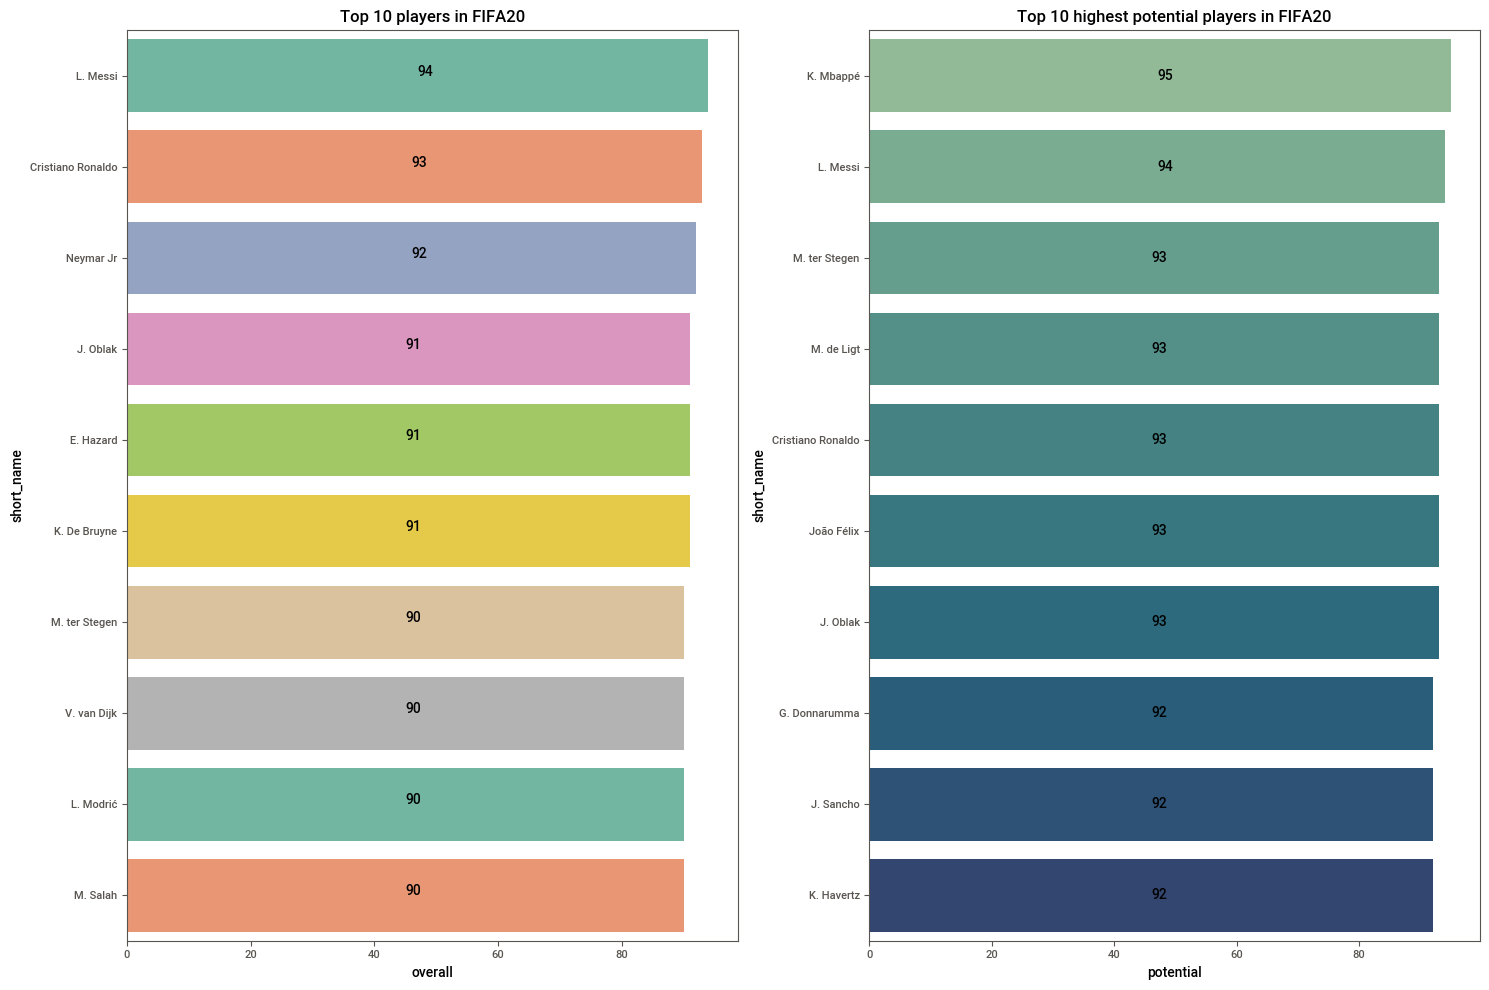

In [47]:
plt.figure(figsize = (15, 10))
plt.subplot(121) 
top_players = fifa[['short_name', 'overall']][ :10]

plt.title("Top 10 players in FIFA20")

sns.barplot(y = top_players.short_name, x = top_players.overall, palette = "Set2")
for index, value in enumerate(top_players.overall):
    plt.text(value//2, index, str(value))
    
plt.subplot(122)

def plot_top20(dataframe, metric):
    metric_df = fifa[['short_name', metric]].sort_values(by = [metric], ascending = False)[ :10]
    plt.title(f"Top 10 highest {metric} players in FIFA20")
    sns.barplot(y = metric_df.short_name, x = metric_df[metric], palette = "crest")
    for index, value in enumerate(metric_df[metric]):
        plt.text(value//2, index, str(round(value, 2)), verticalalignment='center')
plot_top20(fifa, 'potential')

plt.tight_layout()

**Observation:**
- L. Messi and Cristiano Ronaldo has the highest overall rating.
- On the other hand, K. Mbappe and L. Messi are the highest potential rated players.

##### 5. Visualizing the bottom 10 players with least overall rating and potential rating

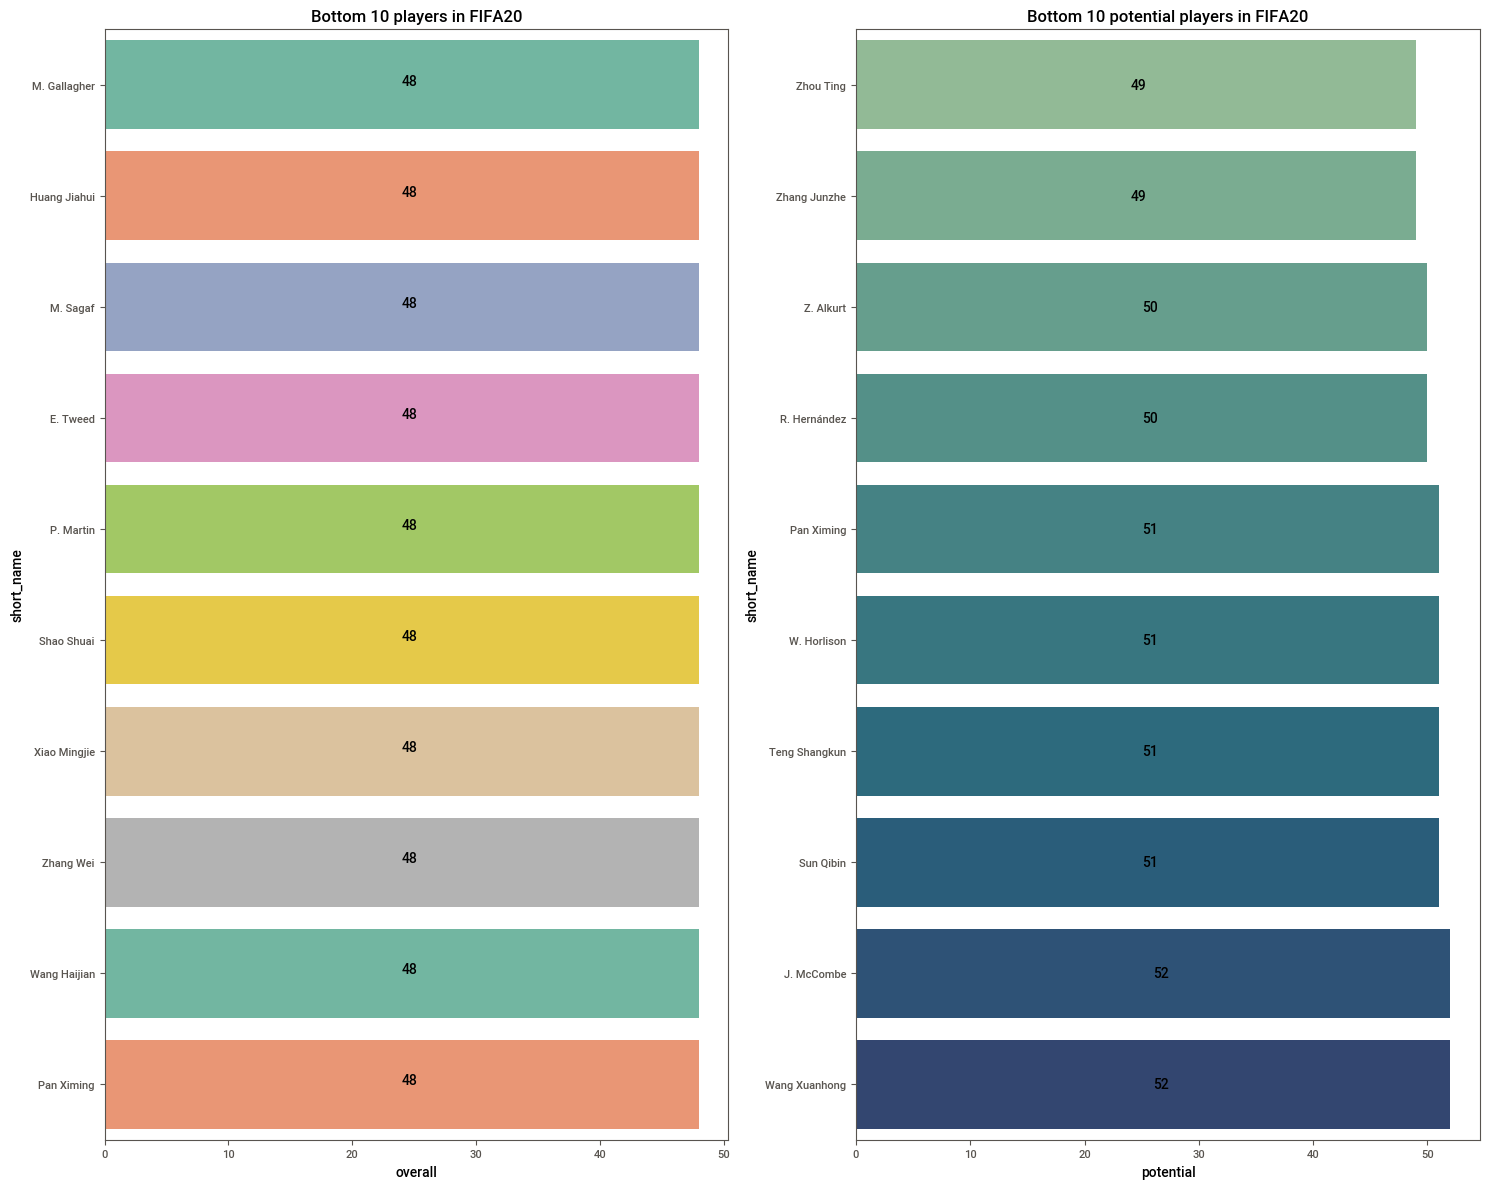

In [48]:
plt.figure(figsize = (15,12))

plt.subplot(121)
low_players = fifa[['short_name', 'overall']][-10: ]
plt.title("Bottom 10 players in FIFA20")

sns.barplot(y = low_players.short_name, x = low_players.overall, palette="Set2")
for index, value in enumerate(low_players.overall):
    plt.text(value//2, index, str(value))
    
plt.subplot(122)

def plot_last20(dataframe, metric):
    metric_df = fifa[['short_name', metric]].sort_values(by = [metric], ascending = True)[:10]
    plt.title(f"Bottom 10 {metric} players in FIFA20")
    sns.barplot(y = metric_df.short_name, x = metric_df[metric], palette = "crest")
    for index, value in enumerate(metric_df[metric]):
        plt.text(value//2, index, str(round(value,2)), verticalalignment = 'center')
plot_last20(fifa, 'potential')

plt.tight_layout()

**Observation:**
- Bottom 10 players are having the lowest overall rating of 48.
- Zhou Ting and Zhang Junzhe are having the lowest potential rating of 49.